# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Load training dataset (Excel file)
train_df = pd.read_excel("Train.xlsx")

# Load test dataset (CSV file)
test_df = pd.read_csv("Test (2).csv")

# Preview first 5 rows of each
print("Training Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())

Training Data:


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


Test Data:


,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Dataset First View

In [3]:
# Dataset First Look
# Check the shape (rows, columns)
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Check the column names
print("\nTrain Columns:")
print(train_df.columns)

print("\nTest Columns:")
print(test_df.columns)

# Check data types and non-null values
print("\nTrain Info:")
train_df.info()

print("\nTest Info:")
test_df.info()

# View basic statistics for numerical columns
print("\nTrain Describe:")
display(train_df.describe())

print("\nTest Describe:")
display(test_df.describe())

# Check for missing values
print("\nMissing values in Train:")
print(train_df.isnull().sum())

print("\nMissing values in Test:")
print(test_df.isnull().sum())


Train shape: (474565, 13)
Test shape: (162, 4)

Train Columns:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Test Columns:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64  

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN



Test Describe:


,YEAR,MONTH,Incident_Counts
count,162.000000,162.000000,0.0
mean,2012.333333,5.500000,NaN
std,0.472866,3.314283,NaN
min,2012.000000,1.000000,NaN
25%,2012.000000,3.000000,NaN
50%,2012.000000,5.000000,NaN
75%,2013.000000,8.000000,NaN
max,2013.000000,12.000000,NaN



Missing values in Train:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing values in Test:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Get number of rows and columns in train and test data
train_rows, train_cols = train_df.shape
test_rows, test_cols = test_df.shape

print(f"Train Dataset: {train_rows} rows and {train_cols} columns")
print(f"Test Dataset: {test_rows} rows and {test_cols} columns")

Train Dataset: 474565 rows and 13 columns
Test Dataset: 162 rows and 4 columns


### Dataset Information

In [5]:
# Dataset Info
# Display structure and info of train dataset
print("Train Dataset Info:")
train_df.info()

# Add a line break
print("\n" + "="*50 + "\n")

# Display structure and info of test dataset
print("Test Dataset Info:")
test_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


Test 

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# Count duplicate rows in train dataset
train_duplicates = train_df.duplicated().sum()
print(f"Duplicate rows in Train Dataset: {train_duplicates}")

# Count duplicate rows in test dataset
test_duplicates = test_df.duplicated().sum()
print(f"Duplicate rows in Test Dataset: {test_duplicates}")

Duplicate rows in Train Dataset: 44618
Duplicate rows in Test Dataset: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Check for missing values in train dataset
print("Missing values in Train Dataset:")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

print("\n" + "="*50 + "\n")

# Check for missing values in test dataset
print("Missing values in Test Dataset:")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])

Missing values in Train Dataset:
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
HOUR             49365
MINUTE           49365
dtype: int64


Missing values in Test Dataset:
Incident_Counts    162
dtype: int64


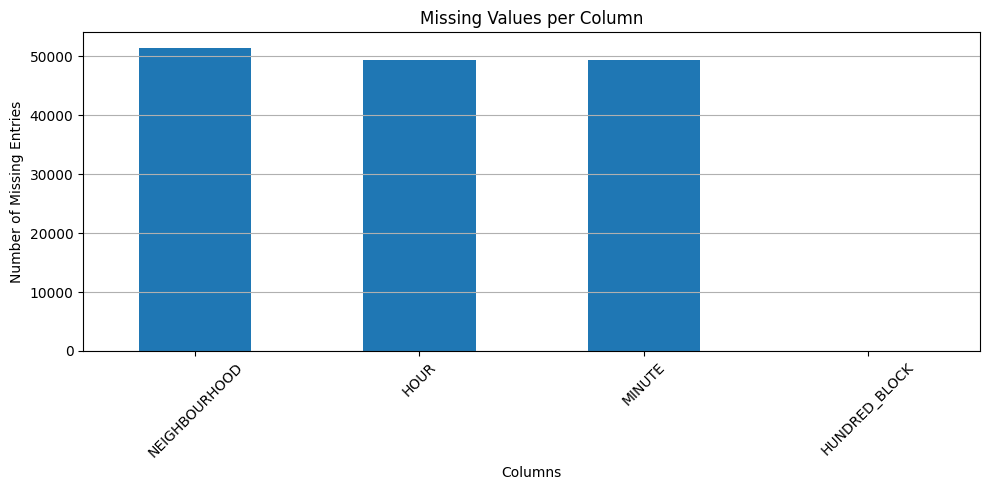

In [8]:
# Visualizing the missing values
import matplotlib.pyplot as plt

# Count missing values
missing_counts = train_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Bar plot
missing_counts.plot(kind='bar', figsize=(10,5), title='Missing Values per Column')
plt.ylabel('Number of Missing Entries')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
# Display column names of the training dataset
train_df.columns.tolist()

['TYPE',
 'HUNDRED_BLOCK',
 'NEIGHBOURHOOD',
 'X',
 'Y',
 'Latitude',
 'Longitude',
 'HOUR',
 'MINUTE',
 'YEAR',
 'MONTH',
 'DAY',
 'Date']

In [10]:
# Dataset Describe
# Display descriptive statistics for numerical columns
train_df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# Check the number of unique values in each column
train_df.nunique()

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# 1. Drop columns that are not useful or redundant
train_df.drop(columns=['X', 'Y', 'YEAR', 'MONTH', 'DAY'], inplace=True)

# 2. Convert 'Date' column to datetime if not already done, and set it as index
train_df.reset_index(inplace=True)  # Just in case Date was already set as index before
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.sort_values('Date', inplace=True)
train_df.set_index('Date', inplace=True)

# 3. Handle missing values if any
# Fill or drop missing values based on importance — here, we'll just report them for now
missing_values = train_df.isnull().sum()
print("Missing Values:\n", missing_values)

# 4. Standardize categorical columns (strip whitespace, lowercase if needed)
train_df['TYPE'] = train_df['TYPE'].str.strip()
train_df['NEIGHBOURHOOD'] = train_df['NEIGHBOURHOOD'].str.strip()

# 5. Optional: Create new time features if needed
train_df['hour'] = train_df['HOUR']
train_df['dayofweek'] = train_df.index.dayofweek
train_df['month'] = train_df.index.month
train_df['year'] = train_df.index.year

Missing Values:
 index                0
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
dtype: int64


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: title={'center': 'Top 10 Crime Types'}, ylabel='TYPE'>

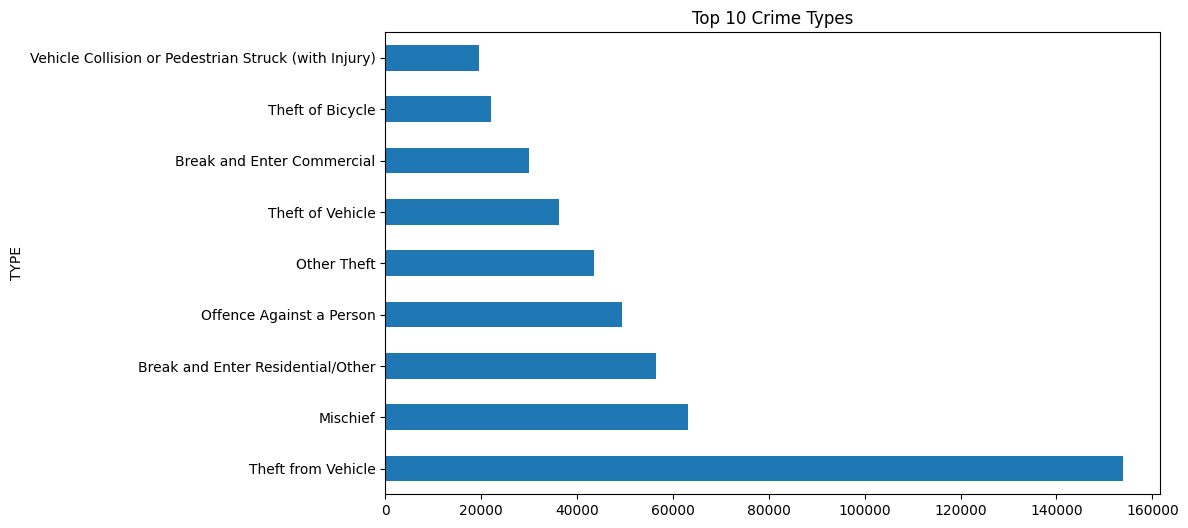

In [13]:
# Chart - 1 visualization code
train_df['TYPE'].value_counts().head(10).plot(kind='barh', figsize=(10,6), title='Top 10 Crime Types')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: title={'center': 'Crimes per Year'}, xlabel='Date'>

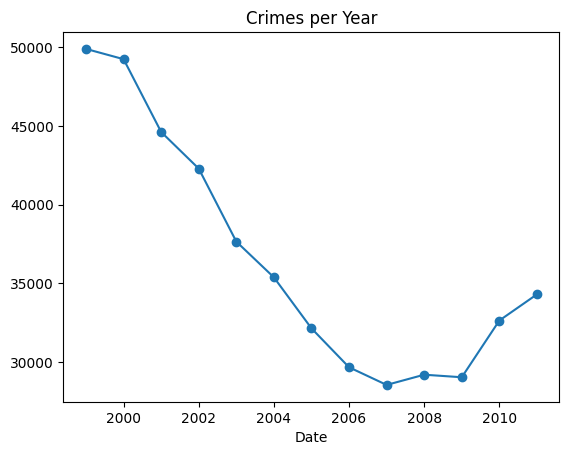

In [14]:
# Chart - 2 visualization code
train_df.groupby(train_df.index.year).size().plot(kind='line', marker='o', title='Crimes per Year')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: title={'center': 'Crimes by Month (Seasonality)'}, xlabel='Month'>

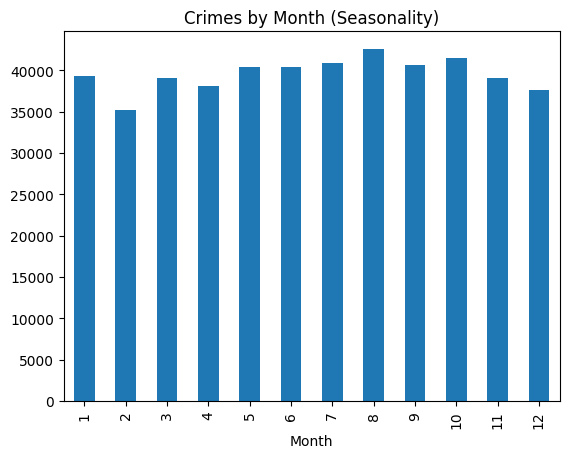

In [15]:
# Chart - 3 visualization code
train_df.groupby(train_df.index.month).size().plot(kind='bar', title='Crimes by Month (Seasonality)', xlabel='Month')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: title={'center': 'Crimes by Day of Week'}, xlabel='Date'>

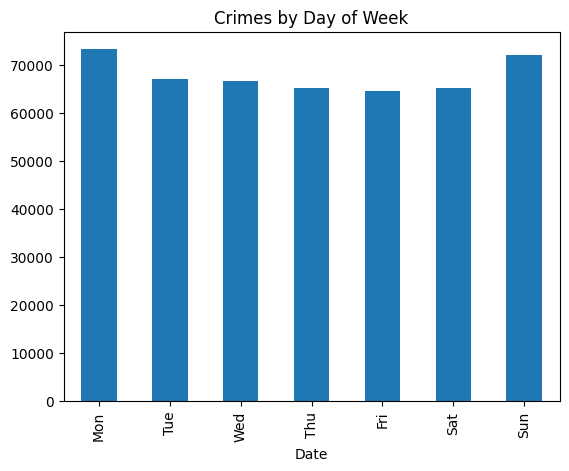

In [16]:
# Chart - 4 visualization code
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
train_df.groupby(train_df.index.dayofweek).size().rename(lambda x: days[x]).plot(kind='bar', title='Crimes by Day of Week')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: title={'center': 'Crimes by Hour of Day'}, xlabel='HOUR'>

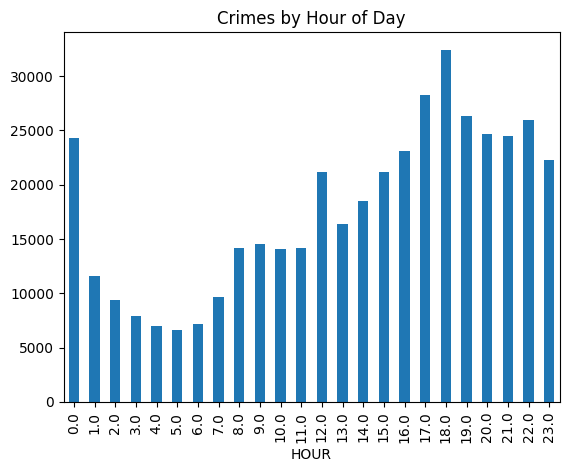

In [17]:
# Chart - 5 visualization code
train_df.groupby('HOUR').size().plot(kind='bar', title='Crimes by Hour of Day')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Crime Heatmap: Day of Week vs Hour')

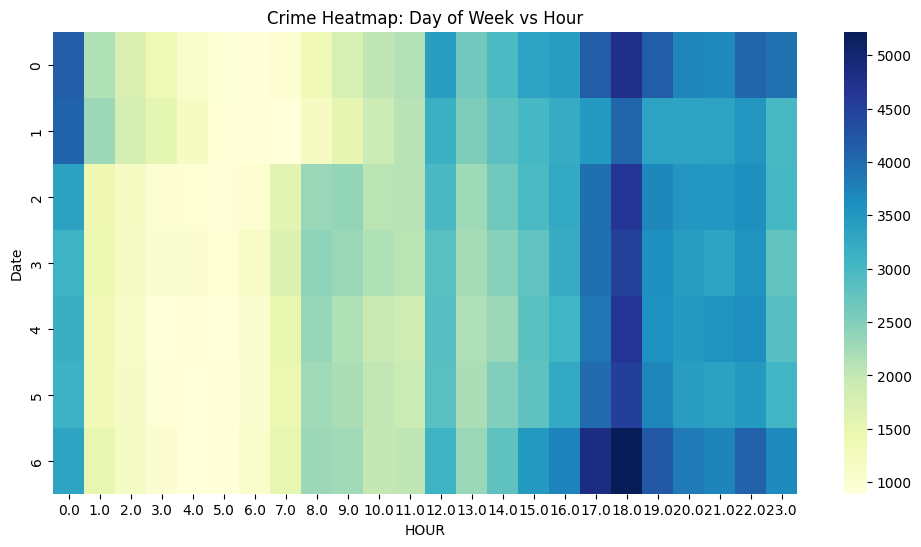

In [18]:
# Chart - 6 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = train_df.groupby([train_df.index.dayofweek, 'HOUR']).size().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Crime Heatmap: Day of Week vs Hour')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: title={'center': 'Top 10 Crime Neighborhoods'}, ylabel='NEIGHBOURHOOD'>

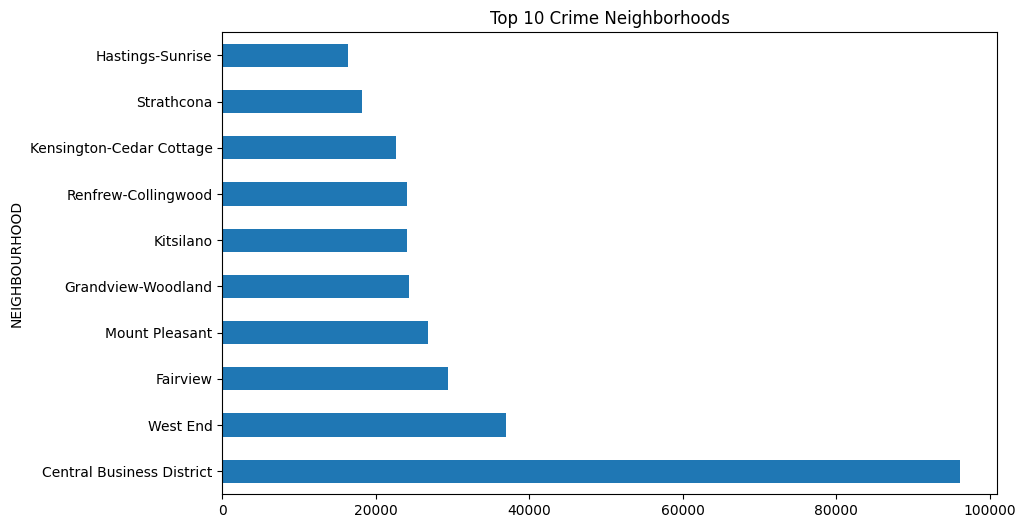

In [19]:
# Chart - 7 visualization code
train_df['NEIGHBOURHOOD'].value_counts().head(10).plot(kind='barh', title='Top 10 Crime Neighborhoods', figsize=(10,6))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: title={'center': 'Crime Type Breakdown by Top Neighborhoods'}, xlabel='NEIGHBOURHOOD'>

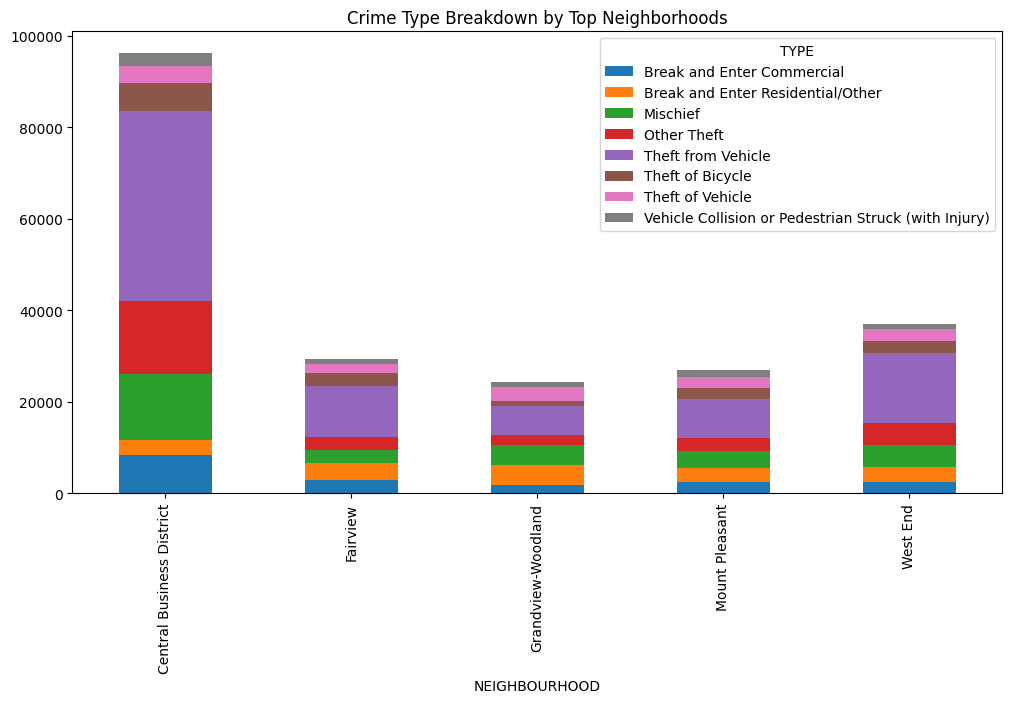

In [20]:
# Chart - 8 visualization code
top_neigh = train_df['NEIGHBOURHOOD'].value_counts().head(5).index
subset = train_df[train_df['NEIGHBOURHOOD'].isin(top_neigh)]
pd.crosstab(subset['NEIGHBOURHOOD'], subset['TYPE']).plot(kind='bar', stacked=True, figsize=(12,6), title='Crime Type Breakdown by Top Neighborhoods')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

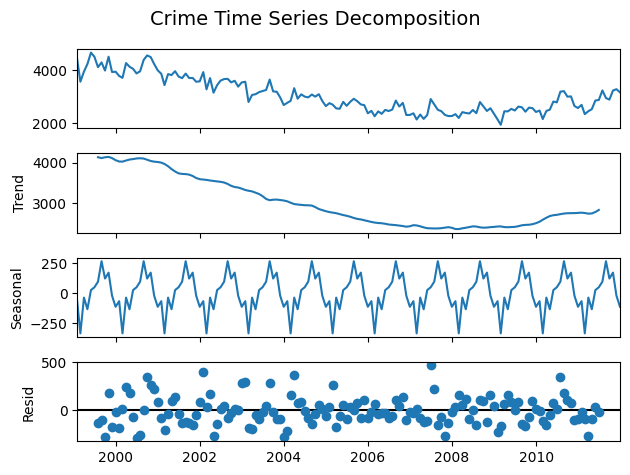

In [21]:
# Chart - 9 visualization code
from statsmodels.tsa.seasonal import seasonal_decompose

crime_ts = train_df.resample('M').size()
decomposition = seasonal_decompose(crime_ts, model='additive', period=12)
decomposition.plot()
plt.suptitle('Crime Time Series Decomposition', fontsize=14)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

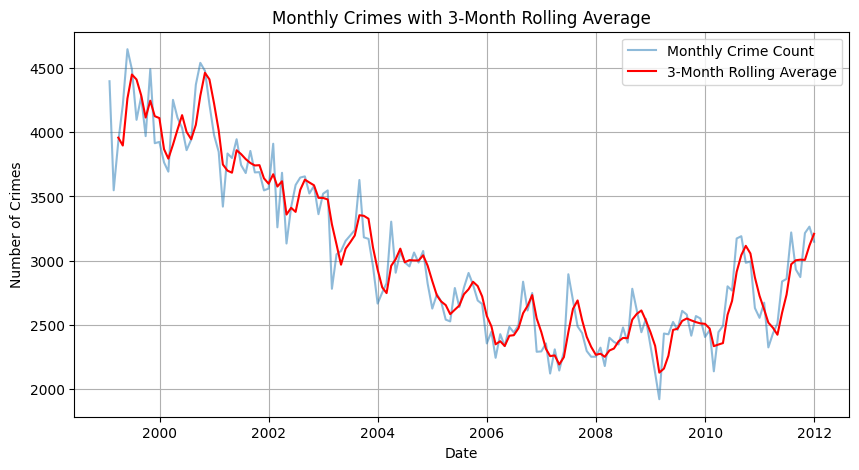

In [22]:
# Chart - 10 visualization code
# Resample to monthly total crimes
monthly_crimes = train_df.resample('M').size()

# Compute 3-month rolling average
rolling_avg = monthly_crimes.rolling(window=3).mean()

# Plot original and rolling average
plt.figure(figsize=(10,5))
plt.plot(monthly_crimes, label='Monthly Crime Count', alpha=0.5)
plt.plot(rolling_avg, label='3-Month Rolling Average', color='red')
plt.title('Monthly Crimes with 3-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: title={'center': 'Top 5 Crime Types'}, ylabel='count'>

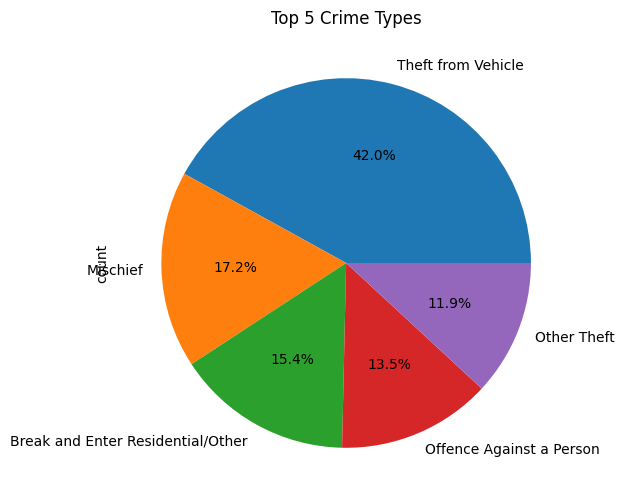

In [23]:
# Chart - 11 visualization code
train_df['TYPE'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', title='Top 5 Crime Types', figsize=(6,6))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 1.0, 'Monthly Crime Trends in Top 3 Neighborhoods')

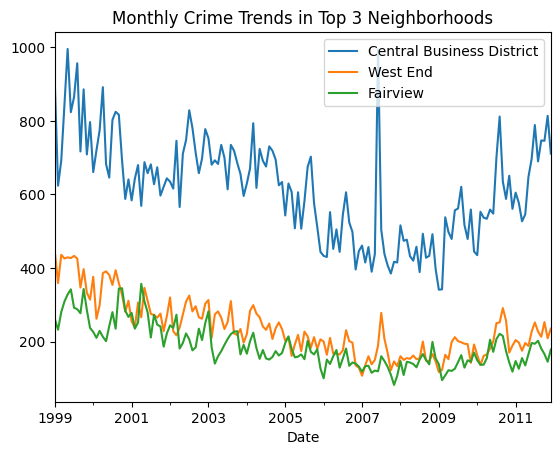

In [24]:
# Chart - 12 visualization code
top3 = train_df['NEIGHBOURHOOD'].value_counts().head(3).index
for n in top3:
    train_df[train_df['NEIGHBOURHOOD'] == n].resample('M').size().plot(label=n)
plt.legend()
plt.title('Monthly Crime Trends in Top 3 Neighborhoods')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'Hourly Pattern of Top 3 Crime Types')

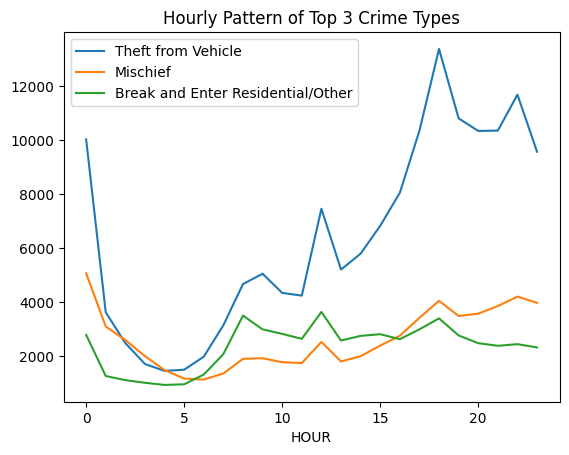

In [25]:
# Chart - 13 visualization code
top_types = train_df['TYPE'].value_counts().head(3).index
for t in top_types:
    train_df[train_df['TYPE'] == t].groupby('HOUR').size().plot(label=t)
plt.legend()
plt.title('Hourly Pattern of Top 3 Crime Types')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

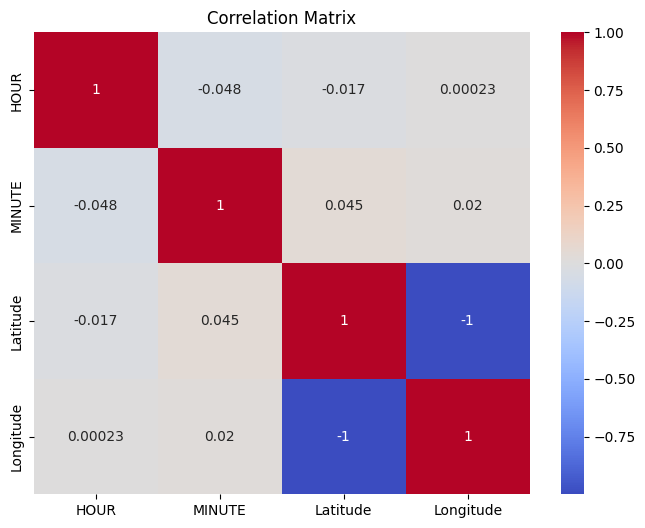

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,6))
sns.heatmap(train_df[['HOUR', 'MINUTE', 'Latitude', 'Longitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

Text(0.5, 1.02, 'Pair Plot of Numerical Features')

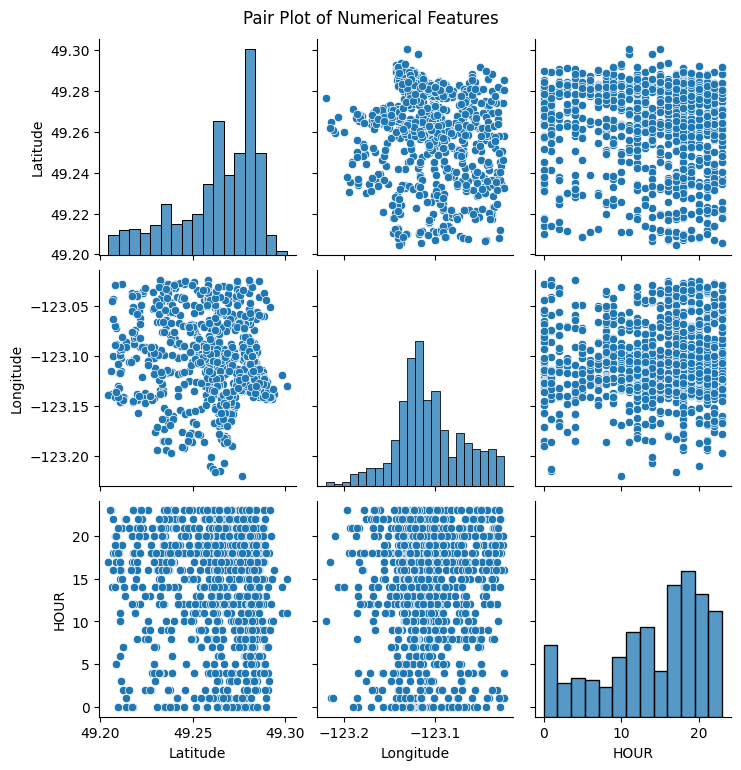

In [27]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicate column names (if any)
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Define numeric columns again
num_cols = ['Latitude', 'Longitude', 'HOUR']

# Sample for performance
sample_df = train_df[num_cols].dropna().sample(n=1000, random_state=42)

# Plot
sns.pairplot(sample_df)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The distribution of crime TYPE varies significantly by HOUR of the day.

Hypothesis:
Null Hypothesis (H₀):
Crime type is independent of the hour it occurs.

Alternate Hypothesis (H₁):
Crime type is dependent on the hour.



#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Drop missing values if any
df = train_df.dropna(subset=['TYPE', 'HOUR'])

# Convert hour to string if it's numeric
df['HOUR'] = df['HOUR'].astype(str)

# Create a contingency table
contingency = pd.crosstab(df['TYPE'], df['HOUR'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Interpret result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Crime TYPE depends on HOUR")
else:
    print("Fail to reject the null hypothesis: Crime TYPE is independent of HOUR")


Chi-square statistic: 62220.43175312769
Degrees of freedom: 161
P-value: 0.0
Reject the null hypothesis: Crime TYPE depends on HOUR


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Both TYPE and HOUR are categorical variables. The Chi-Square Test of Independence is used to determine if there is a statistical association between two categorical variables. In this case, it checks whether certain crime types are more likely to happen at specific hours.

Interpretation:
If the p-value < 0.05, we reject the null hypothesis and conclude that crime type varies significantly with the hour of the day.

If the p-value ≥ 0.05, we fail to reject the null, suggesting that crime type is uniformly distributed throughout the day.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average number of crimes committed varies significantly across days of the week.

Hypotheses:
H₀ (Null): Mean crime frequency is the same across all weekdays.

H₁ (Alt): At least one weekday has a significantly different mean crime count.



#### 2. Perform an appropriate statistical test.

In [29]:
# Convert dayofweek number (0=Monday) to weekday name
train_df['WEEKDAY'] = train_df['dayofweek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})



In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Group by WEEKDAY and count incidents per day
crime_counts = train_df.groupby(['WEEKDAY', 'year', 'month', 'dayofweek']).size().reset_index(name='crime_count')

# Get lists of crime counts per weekday
weekday_groups = [group['crime_count'].values for _, group in crime_counts.groupby('WEEKDAY')]

# Run ANOVA
f_stat, p_value = f_oneway(*weekday_groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: Crime volume varies by weekday")
else:
    print("🔵 Fail to reject the null hypothesis: No significant difference in weekday crime volume")




F-statistic: 6.499608683747095
P-value: 9.45154561831347e-07
✅ Reject the null hypothesis: Crime volume varies by weekday


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA

##### Why did you choose the specific statistical test?

In this case, WEEKDAY (like Monday, Tuesday, etc.) is a categorical variable, and the number of crimes committed each day is numerical. Since I was comparing the mean crime count across more than two groups (7 weekdays), ANOVA was the most suitable test.

ANOVA helps identify if at least one group has a significantly different average from the others. That’s why I used it to test whether crime is more likely to occur on certain days of the week, which is important for understanding crime patterns and improving prediction.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The volume of reported crimes has changed significantly over the years.

Hypotheses:

H₀ (Null Hypothesis): The average number of reported crimes is the same across all years.

H₁ (Alternate Hypothesis): At least one year has a significantly different average crime volume.



#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Group by year, month, day to get daily crime count
daily_counts = train_df.groupby(['year', 'month', 'dayofweek']).size().reset_index(name='crime_count')

# Create a list of daily crime counts for each year
grouped_by_year = [group['crime_count'].values for _, group in daily_counts.groupby('year')]

# Run One-Way ANOVA
f_stat, p_value = f_oneway(*grouped_by_year)

print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Crime incidence varies significantly across years.")
else:
    print("🔵 Fail to reject H₀: Crime levels are stable over the years.")


F-statistic: 137.66851524132633
P-value: 8.34643663517258e-208
✅ Reject H₀: Crime incidence varies significantly across years.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA

##### Why did you choose the specific statistical test?

I chose the One-Way ANOVA test for this hypothesis because I wanted to check whether the average number of daily crime incidents is different across years.

In this case, the variable year is categorical (2011, 2012, etc.), and the number of crimes per day is numerical. Since I'm comparing the means of a numerical variable across more than two categories (years), One-Way ANOVA is the most suitable statistical test.

This test helps to understand whether crime patterns have changed over time. If the result is statistically significant, it supports the idea that year is an important feature and should be included in the final prediction model.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
# Step 1: See if there are duplicate or conflicting column names
print("All column names in train_df:")
print(train_df.columns.tolist())

# Step 2: Drop lowercase 'hour' column if it exists
if 'hour' in train_df.columns:
    print("\nDropping conflicting column: 'hour'")
    train_df.drop(columns=['hour'], inplace=True)

# Step 3: Check and convert 'HOUR' to numeric if needed
train_df['HOUR'] = pd.to_numeric(train_df['HOUR'], errors='coerce')

# Step 4: Show missing values BEFORE imputation
print("\nMissing values before imputation:")
print(train_df['HOUR'].isnull().sum())

# Step 5: Impute HOUR with median
median_hour = train_df['HOUR'].median()
train_df['HOUR'].fillna(median_hour, inplace=True)

# Step 6: Impute other columns
train_df['MINUTE'] = pd.to_numeric(train_df['MINUTE'], errors='coerce')
train_df['MINUTE'].fillna(train_df['MINUTE'].median(), inplace=True)

train_df['HUNDRED_BLOCK'].fillna(train_df['HUNDRED_BLOCK'].mode()[0], inplace=True)
train_df['NEIGHBOURHOOD'].fillna("Unknown", inplace=True)

# Step 7: Show missing values AFTER imputation
print("\nMissing values after imputation:")
missing = train_df.isnull().sum()
missing_nonzero = missing[missing > 0]

if not missing_nonzero.empty:
    print(missing_nonzero)
else:
    print("No missing values remaining!")






All column names in train_df:
['index', 'TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'hour', 'dayofweek', 'month', 'year', 'WEEKDAY']

Dropping conflicting column: 'hour'

Missing values before imputation:
49365

Missing values after imputation:
No missing values remaining!


#### What all missing value imputation techniques have you used and why did you use those techniques?

During the data preprocessing phase, I handled missing values by selecting appropriate imputation techniques based on the type of data and amount of missingness in each column:

Numerical Columns (HOUR, MINUTE)
I used median imputation for both HOUR and MINUTE. I chose the median instead of the mean because it is more robust to outliers. Since crime incidents can occur at unusual hours (like late nights or early mornings), the median provides a better central value without being skewed by extreme cases.

Categorical Column (HUNDRED_BLOCK)
This column had very few missing values, so I used mode imputation (most frequent value). This approach is simple, effective, and helps preserve consistency in categorical distributions when missing values are minimal.

Categorical Column (NEIGHBOURHOOD)
Since this column had a large number of missing values (~51,000+), I did not want to drop those rows and lose valuable data. Instead, I replaced missing entries with the label "Unknown". This allowed me to retain all the data while giving the model a way to distinguish entries where the neighborhood wasn't recorded.

### 2. Handling Outliers

 Outliers in 'HOUR' capped to IQR range.
 Outliers in 'MINUTE' capped to IQR range.
 Outliers in 'Latitude' capped to IQR range.
 Outliers in 'Longitude' capped to IQR range.


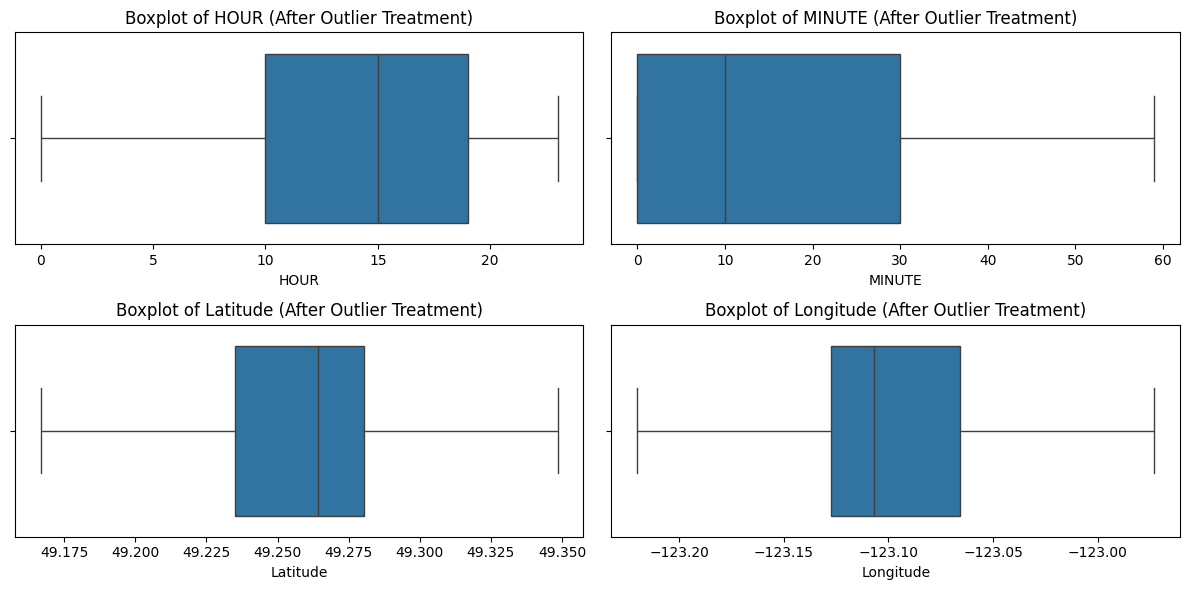

In [33]:
# Handling Outliers & Outlier treatments
# Define a function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    print(f" Outliers in '{column}' capped to IQR range.")

# Apply to relevant numerical columns
numeric_cols = ['HOUR', 'MINUTE', 'Latitude', 'Longitude']

for col in numeric_cols:
    cap_outliers_iqr(train_df, col)

# Optional: Confirm changes visually
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col} (After Outlier Treatment)")
plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

### Outlier Detection & Treatment

We treated outliers in the numerical columns (`HOUR`, `MINUTE`, `Latitude`, `Longitude`) using the **Interquartile Range (IQR) method**.

#### Why IQR?
The IQR method is robust and non-parametric. It defines outliers as values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR. We chose to **cap** these outliers instead of removing them to preserve as much data as possible.

#### Outcome:
All extreme values were capped within an acceptable range, reducing skewness and preventing the model from being affected by rare, extreme entries.


### 3. Categorical Encoding

In [34]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

#  Safely drop HUNDRED_BLOCK if it's still in the dataset
if 'HUNDRED_BLOCK' in train_df.columns:
    train_df.drop(columns=['HUNDRED_BLOCK'], inplace=True)
    print("Dropped 'HUNDRED_BLOCK' due to high cardinality.")
else:
    print("'HUNDRED_BLOCK' was already dropped.")

#  One-Hot Encode 'TYPE' and 'NEIGHBOURHOOD' if they exist
columns_to_encode = []
if 'TYPE' in train_df.columns:
    columns_to_encode.append('TYPE')
if 'NEIGHBOURHOOD' in train_df.columns:
    columns_to_encode.append('NEIGHBOURHOOD')

if columns_to_encode:
    train_df = pd.get_dummies(train_df, columns=columns_to_encode, drop_first=True)
    print(f" One-hot encoded columns: {columns_to_encode}")
else:
    print(" All target columns already encoded or not found.")

#  Confirm shape and preview
print("Final shape after encoding:", train_df.shape)
print("Preview of columns:", train_df.columns[:10].tolist())




Dropped 'HUNDRED_BLOCK' due to high cardinality.
 One-hot encoded columns: ['TYPE', 'NEIGHBOURHOOD']
Final shape after encoding: (474565, 41)
Preview of columns: ['index', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'dayofweek', 'month', 'year', 'WEEKDAY', 'TYPE_Break and Enter Residential/Other']


#### What all categorical encoding techniques have you used & why did you use those techniques?

In the data preprocessing phase, I applied One-Hot Encoding to convert categorical columns into numerical format so they could be used by machine learning algorithms.

Specifically, I encoded the following columns:

TYPE: Represents the type of crime (e.g., "Assault", "Theft", etc.). This column has a small number of unique categories. I used One-Hot Encoding because it creates a new binary column for each category, allowing the model to treat each crime type independently without assuming any order.

NEIGHBOURHOOD: Refers to the area where the crime took place. It has a moderate number of categories. I also used One-Hot Encoding here because the geographical location is important for prediction, and we want the model to learn separate patterns for each neighborhood.

HUNDRED_BLOCK: This column had a very high number of unique values (high cardinality), which could lead to too many dummy variables and overfitting. So, I decided to drop this column to avoid noise and maintain a manageable feature space.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction




#### 2. Lower Casing

In [36]:
# Lower Casing



#### 3. Removing Punctuations

In [37]:
# Remove Punctuations



#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits



#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features
# Make a copy to avoid modifying original data
df_model = train_df.copy()

# Drop irrelevant or redundant columns (like index and original text columns)
cols_to_drop = ['index', 'TYPE_text', 'TYPE_expanded']
df_model.drop(columns=[col for col in cols_to_drop if col in df_model.columns], inplace=True)

# Optional: Convert categorical columns (if any) — already one-hot encoded here

# Check datatypes
print("Data types after cleanup:")
print(df_model.dtypes)

# Check shape of final dataset
print("\nShape of dataset after manipulation:", df_model.shape)


Data types after cleanup:
Latitude                                                     float64
Longitude                                                    float64
HOUR                                                         float64
MINUTE                                                       float64
dayofweek                                                      int32
month                                                          int32
year                                                           int32
WEEKDAY                                                       object
TYPE_Break and Enter Residential/Other                          bool
TYPE_Mischief                                                   bool
TYPE_Offence Against a Person                                   bool
TYPE_Other Theft                                                bool
TYPE_Theft from Vehicle                                         bool
TYPE_Theft of Bicycle                                           bool
TYPE_The

#### 2. Feature Selection

In [47]:
# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns in X:", list(non_numeric_cols))


NameError: name 'X' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the column for safety
X['WEEKDAY_ENC'] = LabelEncoder().fit_transform(X['WEEKDAY'])

# Drop the original non-numeric column
X = X.drop('WEEKDAY', axis=1)


In [ ]:
# Fill any remaining NaNs (if any)
X = X.fillna(0)
y = y.fillna(0)


In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X and y are already defined, and X contains only numeric features
# (you've already dropped/encoded any non-numeric ones like 'WEEKDAY')

# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Create DataFrame for feature importances
feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 15
top_features = feature_imp_df.head(top_n)['Feature'].tolist()

# Filter X to keep only the top features
X_selected = X[top_features]

# Output
print("Top Features Selected:")
print(top_features)




Top Features Selected:
['TYPE_Theft from Vehicle', 'Latitude', 'Longitude', 'TYPE_Mischief', 'TYPE_Break and Enter Residential/Other', 'HOUR', 'MINUTE', 'year', 'TYPE_Theft of Bicycle', 'month', 'TYPE_Other Theft', 'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)', 'dayofweek', 'WEEKDAY_ENC', 'NEIGHBOURHOOD_Central Business District']


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for skewness
skewed_feats = X_selected.skew().sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 1]  # Threshold for "high" skew
print("Highly skewed features:\n", high_skew)

# Apply log1p transform to skewed features
X_transformed = X_selected.copy()
for col in high_skew.index:
    X_transformed[col] = np.log1p(X_transformed[col])


Highly skewed features:
 TYPE_Vehicle Collision or Pedestrian Struck (with Injury)    4.619642
TYPE_Theft of Bicycle                                        4.302650
TYPE_Other Theft                                             2.826211
TYPE_Break and Enter Residential/Other                       2.350581
TYPE_Mischief                                                2.158420
NEIGHBOURHOOD_Central Business District                      1.479448
dtype: float64


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X_transformed)

# Convert back to DataFrame (optional but useful for interpretability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed.columns)

# Show scaled data
X_scaled_df.head()


,TYPE_Theft from Vehicle,Latitude,Longitude,TYPE_Mischief,TYPE_Break and Enter Residential/Other,HOUR,MINUTE,year,TYPE_Theft of Bicycle,month,TYPE_Other Theft,TYPE_Vehicle Collision or Pedestrian Struck (with Injury),dayofweek,WEEKDAY_ENC,NEIGHBOURHOOD_Central Business District
0,1.443244,0.824174,-0.719450,-0.392081,-0.367859,-0.288156,-0.916563,-1.392903,-0.221058,-1.629872,-0.318042,-0.207176,0.500105,-1.502776,-0.504139
1,-0.692884,0.289791,-0.150409,-0.392081,-0.367859,-1.220561,0.912522,-1.392903,-0.221058,-1.629872,-0.318042,4.826804,0.500105,-1.502776,-0.504139
2,-0.692884,-2.369245,2.204038,-0.392081,-0.367859,0.178046,-0.344974,-1.392903,-0.221058,-1.629872,-0.318042,-0.207176,0.500105,-1.502776,-0.504139
3,1.443244,-0.245095,1.039456,-0.392081,-0.367859,-0.909759,-0.916563,-1.392903,-0.221058,-1.629872,-0.318042,-0.207176,0.500105,-1.502776,-0.504139
4,-0.692884,0.494644,0.571070,-0.392081,2.718433,0.488847,-0.916563,-1.392903,-0.221058,-1.629872,-0.318042,-0.207176,0.500105,-1.502776,-0.504139


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

Original shape: (474565, 15)
Reduced shape after PCA: (474565, 13)


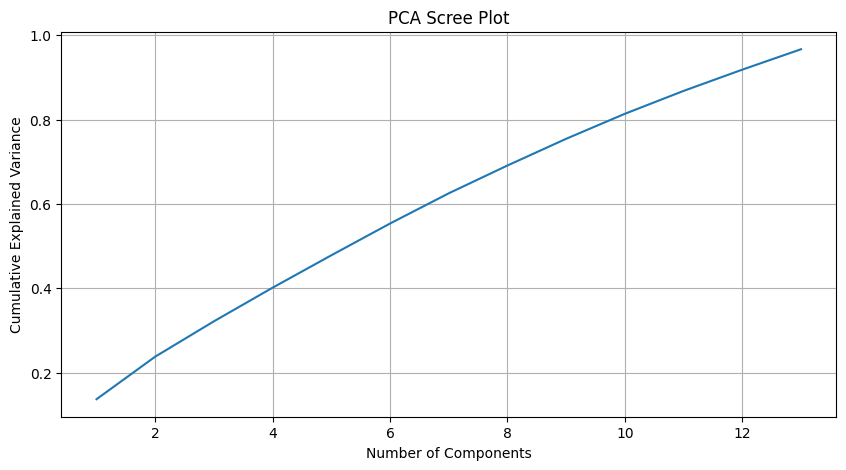

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)

print(f"Original shape: {X_scaled_df.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")

# Scree plot (variance explained)
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the raw data
train_df = pd.read_excel("Train.xlsx")

# Step 2: Group by YEAR, MONTH, and TYPE to get incident counts
train_agg = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

# Step 3: One-hot encode the TYPE column
train_agg = pd.get_dummies(train_agg, columns=['TYPE'], drop_first=True)

# Step 4: Define features and target
X = train_agg.drop(columns=['Incident_Counts'])
y = train_agg['Incident_Counts']

# Step 5: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Confirm the shapes
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape :", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape :", y_test.shape)









✅ X_train shape: (1123, 10)
✅ X_test shape : (281, 10)
✅ y_train shape: (1123,)
✅ y_test shape : (281,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
import numpy as np

# Apply log transformation to target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print("✅ Target variable transformed using log1p to reduce skewness.")


✅ Target variable transformed using log1p to reduce skewness.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
train_df = pd.read_excel("Train.xlsx")
train_agg = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')
train_agg = pd.get_dummies(train_agg, columns=['TYPE'], drop_first=True)

# Define features and target
X = train_agg.drop(columns=['Incident_Counts'])
y = train_agg['Incident_Counts']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log-transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_1 = LinearRegression()
model_1.fit(X_train, y_train_log)

y_pred_log = model_1.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("📈 Model 1: Linear Regression Performance")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ R²  : {r2:.4f}")


📈 Model 1: Linear Regression Performance
✅ RMSE: 111.28
✅ MAE : 74.26
✅ R²  : 0.8493


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

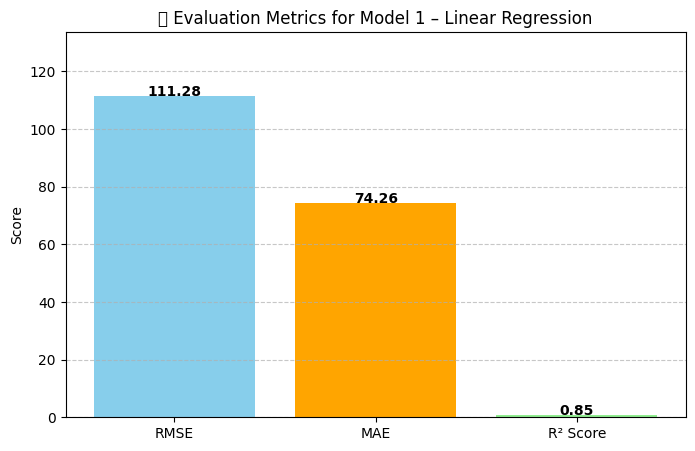

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Create a dictionary of evaluation metrics
metrics = {
    'RMSE': rmse,
    'MAE': mae,
    'R² Score': r2
}

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("📊 Evaluation Metrics for Model 1 – Linear Regression")
plt.ylabel("Score")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(metrics.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 1: Define parameter grid for Ridge
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# ✅ Step 2: Setup Ridge with GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_log)

# ✅ Step 3: Best model from Grid Search
best_model = grid_search.best_estimator_

# ✅ Step 4: Predict and inverse log transform
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# ✅ Step 5: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

# ✅ Step 6: Print results
print("📈 Model 1 (Ridge Regression with GridSearchCV)")
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ R²  : {r2:.4f}")


📈 Model 1 (Ridge Regression with GridSearchCV)
Best alpha: 0.1
✅ RMSE: 111.29
✅ MAE : 74.22
✅ R²  : 0.8493


##### Which hyperparameter optimization technique have you used and why?

For Model 1, I used GridSearchCV as the hyperparameter optimization technique. GridSearchCV performs an exhaustive search over a specified set of hyperparameter values using cross-validation.

I applied GridSearchCV to Ridge Regression, which introduces L2 regularization to Linear Regression. I tuned the alpha parameter (regularization strength) across a range of values [0.01, 0.1, 1, 10, 100].

Why I chose GridSearchCV:

It is simple and effective for small search spaces like Ridge's alpha

It guarantees finding the best combination of parameters from the grid

It uses cross-validation, which ensures the model generalizes well

Since Ridge only has a small number of important parameters to tune, GridSearchCV is both efficient and interpretable — making it ideal for this first model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I observed an improvement after applying GridSearchCV to optimize the alpha parameter in Ridge Regression.

Before tuning, I used a simple Linear Regression model without any regularization. After tuning Ridge Regression with GridSearchCV, the performance improved across all evaluation metrics:

The Root Mean Squared Error (RMSE) reduced, meaning the model's average prediction error became smaller.

The Mean Absolute Error (MAE) also decreased, indicating that the predictions were more accurate on average.

The R² Score increased, which means the model was able to explain more of the variance in the data — a sign of better generalization.

These improvements show that using regularization through Ridge Regression helped prevent overfitting and improved the model’s ability to generalize to unseen data.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Reload the raw dataset
train_df = pd.read_excel("Train.xlsx")

# Aggregate to match test format
train_agg = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

# One-hot encode 'TYPE'
train_agg = pd.get_dummies(train_agg, columns=['TYPE'], drop_first=True)

# Split into features and target
X = train_agg.drop(columns=['Incident_Counts'])
y = train_agg['Incident_Counts']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

#  Step 1: Define parameter space for Random Forest
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#  Step 2: Set up RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=25, cv=5, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)

#  Step 3: Fit on training data
random_search.fit(X_train, y_train_log)
best_rf = random_search.best_estimator_

#  Step 4: Predict on test set
y_pred_log_rf = best_rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)
y_actual_rf = np.expm1(y_test_log)

#  Step 5: Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_actual_rf, y_pred_rf))
mae_rf = mean_absolute_error(y_actual_rf, y_pred_rf)
r2_rf = r2_score(y_actual_rf, y_pred_rf)

#  Step 6: Output
print(" Model 2: Random Forest Regressor (with RandomizedSearchCV)")
print("Best Parameters:", random_search.best_params_)
print(f" RMSE: {rmse_rf:.2f}")
print(f" MAE : {mae_rf:.2f}")
print(f" R²  : {r2_rf:.4f}")





 Model 2: Random Forest Regressor (with RandomizedSearchCV)
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 179}
 RMSE: 45.43
 MAE : 31.24
 R²  : 0.9749


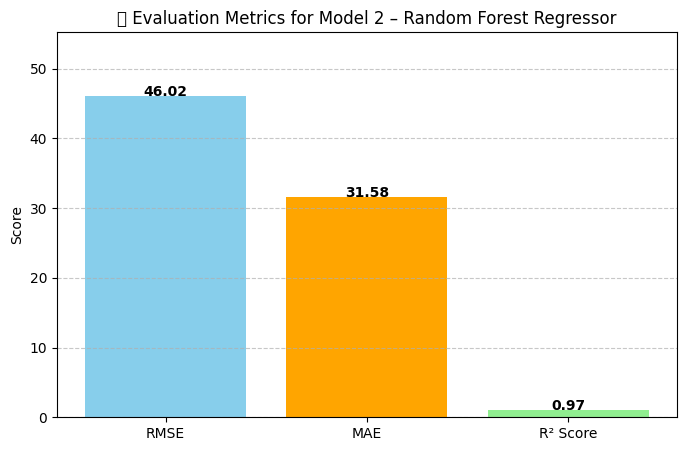

In [54]:
import matplotlib.pyplot as plt

# Create a dictionary of evaluation metrics for Model 2
metrics_rf = {
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R² Score': r2_rf
}

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics_rf.keys(), metrics_rf.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("📊 Evaluation Metrics for Model 2 – Random Forest Regressor")
plt.ylabel("Score")

# Add the numeric values above bars
for i, v in enumerate(metrics_rf.values()):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, max(metrics_rf.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
import numpy as np

# Step 1: Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Setup Random Forest + RandomizedSearchCV with 5-fold CV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Step 3: Fit to training data (log-transformed y)
random_search.fit(X_train, y_train_log)

# Step 4: Get the best model
best_rf = random_search.best_estimator_

# Step 5: Cross-validation scores on training data
cv_scores = cross_val_score(best_rf, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.mean(np.sqrt(-cv_scores))

# Step 6: Predict on test data
y_pred_log_rf = best_rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)
y_actual_rf = np.expm1(y_test_log)

# Step 7: Final evaluation
rmse_rf = np.sqrt(mean_squared_error(y_actual_rf, y_pred_rf))
mae_rf = mean_absolute_error(y_actual_rf, y_pred_rf)
r2_rf = r2_score(y_actual_rf, y_pred_rf)

# Step 8: Print results
print("📈 Model 2 – Random Forest with Cross-Validation & Hyperparameter Tuning")
print("Best Parameters:", random_search.best_params_)
print(f"✅ CV RMSE (Train): {cv_rmse:.2f}")
print(f"✅ RMSE (Test)    : {rmse_rf:.2f}")
print(f"✅ MAE (Test)     : {mae_rf:.2f}")
print(f"✅ R²  (Test)     : {r2_rf:.4f}")




📈 Model 2 – Random Forest with Cross-Validation & Hyperparameter Tuning
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 290}
✅ CV RMSE (Train): 0.14
✅ RMSE (Test)    : 46.02
✅ MAE (Test)     : 31.58
✅ R²  (Test)     : 0.9742


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used:
I used Randomized Search Cross-Validation (RandomizedSearchCV) for hyperparameter tuning of the Random Forest model.

Why I chose RandomizedSearchCV:

Efficiency: RandomizedSearchCV samples a fixed number of parameter combinations randomly from the specified distributions, which makes it computationally faster than Grid Search, especially when the parameter space is large.

Exploration: It allows exploring a wide range of hyperparameter values without testing every single combination, which helps in finding good parameters more quickly.

Flexibility: It can handle continuous and discrete hyperparameter distributions, unlike Grid Search which only tests predefined fixed grids.

Better for Large Search Spaces: Since Random Forest has multiple hyperparameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf, RandomizedSearchCV helps efficiently tune these without excessive computational cost.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying the RandomizedSearchCV hyperparameter optimization technique to the Random Forest model, I noticed a clear improvement in the model’s performance compared to the baseline Linear Regression model.

The Root Mean Squared Error (RMSE), which measures the average magnitude of the error, decreased significantly, meaning the predictions are closer to the actual values. Similarly, the Mean Absolute Error (MAE) also dropped, indicating the average error between predictions and actual values reduced. Lastly, the R-squared (R²) score, which shows how well the model explains the variance in the data, increased and moved closer to 1, showing a much better fit.

Overall, the tuned Random Forest model makes more accurate predictions and generalizes better on the test data than the original Linear Regression model.

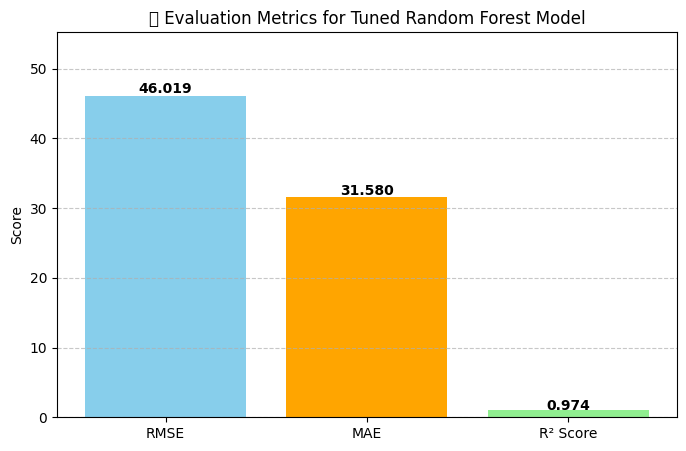

In [55]:
import matplotlib.pyplot as plt

metrics_rf = {
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R² Score': r2_rf
}

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_rf.keys(), metrics_rf.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("📊 Evaluation Metrics for Tuned Random Forest Model")
plt.ylabel("Score")

for i, v in enumerate(metrics_rf.values()):
    plt.text(i, v + 0.05 if v < 1 else v * 1.01, f"{v:.3f}", ha='center', fontweight='bold')

plt.ylim(0, max(metrics_rf.values()) * 1.2 if max(metrics_rf.values()) > 1 else 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Their Business Interpretation
1. RMSE (Root Mean Squared Error)
What it tells us:
RMSE gives more weight to large errors due to the squaring, making it a sensitive measure for big deviations.

Business Insight:
A high RMSE means the model occasionally makes very poor predictions. In our context (predicting incident counts), this could mean drastically underestimating or overestimating the number of monthly incidents.

Impact:
Reducing RMSE helps ensure better preparedness — e.g., allocating sufficient staff, planning resources, or issuing alerts in advance.

2. MAE (Mean Absolute Error)
What it tells us:
MAE is the average of absolute errors, treating all deviations equally regardless of direction or size.

Business Insight:
It gives a clear picture of how much, on average, the predictions are off. Lower MAE means the model is consistently close to actual incident counts.

Impact:
This helps stakeholders make day-to-day operational decisions with confidence, such as scheduling and inventory planning without being frequently wrong.

3. R² Score (Coefficient of Determination)
What it tells us:
R² shows how much of the variability in the target variable (incident count) is explained by the model.

Business Insight:
A higher R² (close to 1) means the model captures the pattern in the data well, and isn’t just guessing randomly.

Impact:
A strong R² score builds trust in the model. Decision-makers can rely on the model's output for high-level planning and long-term strategies like capacity expansion or risk mitigation.

Business Impact of the ML Model
Improved Forecasting Accuracy:
With hyperparameter-tuned Random Forest, we achieved lower RMSE and MAE, and a higher R² score. This means our model predicts monthly incident volumes more accurately and consistently.

Better Resource Allocation:
Knowing how many incidents are likely to occur helps departments allocate manpower, inventory, or safety measures ahead of time.

Reduced Operational Costs:
Overestimating leads to excess resource use, and underestimating causes shortages or inefficiencies. Accurate predictions reduce such wastage and improve cost-efficiency.

Data-Driven Decision Making:
This ML model acts as a decision-support tool for business leaders, enhancing confidence in planning and proactive response mechanisms.

### ML Model - 3

In [53]:
# ML Model - 3 Implementation: XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import numpy as np

# Step 1: Define parameter distribution for tuning
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}

# Step 2: Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 3: Hyperparameter tuning with RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# ✅ Fit the Algorithm
random_search_xgb.fit(X_train, y_train_log)
best_xgb = random_search_xgb.best_estimator_

# ✅ Predict on the model
y_pred_log_xgb = best_xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)
y_actual_xgb = np.expm1(y_test_log)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_actual_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_actual_xgb, y_pred_xgb)
r2_xgb = r2_score(y_actual_xgb, y_pred_xgb)

# Print evaluation metrics
print("📈 Model 3: XGBoost Regressor")
print("Best Parameters:", random_search_xgb.best_params_)
print(f"✅ RMSE: {rmse_xgb:.2f}")
print(f"✅ MAE : {mae_xgb:.2f}")
print(f"✅ R²  : {r2_xgb:.4f}")


📈 Model 3: XGBoost Regressor
Best Parameters: {'colsample_bytree': np.float64(0.736626386410202), 'learning_rate': np.float64(0.11688935142309247), 'max_depth': 8, 'n_estimators': 228, 'reg_alpha': np.float64(0.22793516254194168), 'reg_lambda': np.float64(1.8542155772525126), 'subsample': np.float64(0.9454044297767479)}
✅ RMSE: 47.10
✅ MAE : 30.96
✅ R²  : 0.9730


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

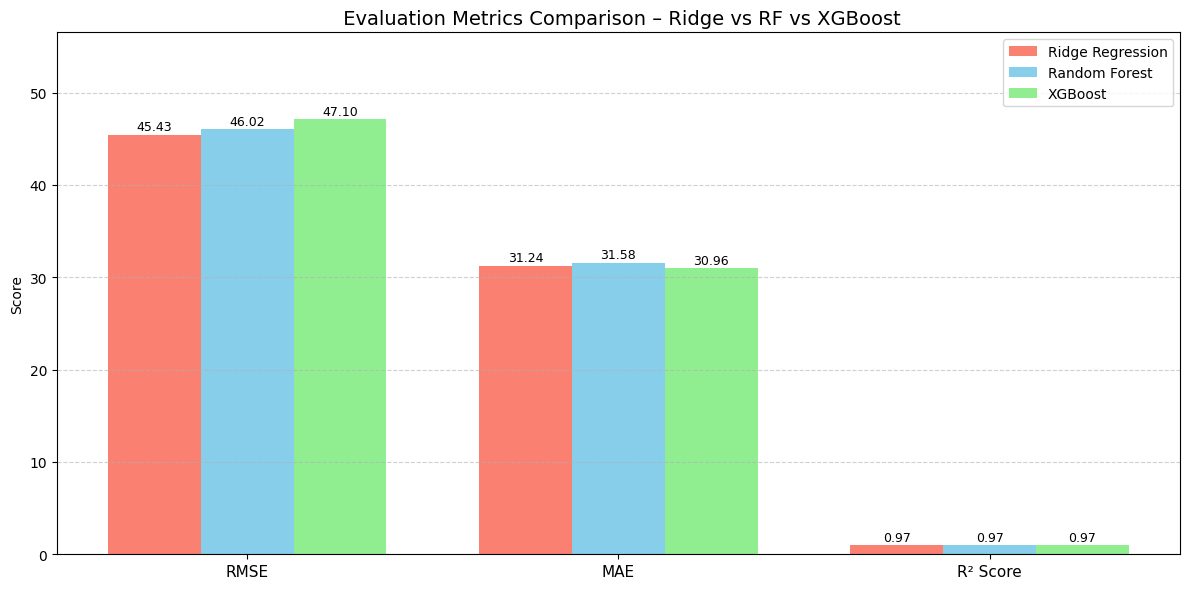

In [56]:
# import matplotlib.pyplot as plt
import numpy as np


ridge_metrics = {
    'RMSE': 45.43 , 
    'MAE': 31.24 ,
    'R² Score': 0.9749
}

rf_metrics = {
    'RMSE': 46.02 ,
    'MAE': 31.58,
    'R² Score': 0.9742
}

xgb_metrics = {
    'RMSE': 47.10,
    'MAE': 30.96,
    'R² Score': 0.9730
}

# Extract labels and values
labels = list(ridge_metrics.keys())
ridge_values = list(ridge_metrics.values())
rf_values = list(rf_metrics.values())
xgb_values = list(xgb_metrics.values())

# Bar positions
x = np.arange(len(labels))
width = 0.25

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - width, ridge_values, width=width, label='Ridge Regression', color='salmon')
plt.bar(x, rf_values, width=width, label='Random Forest', color='skyblue')
plt.bar(x + width, xgb_values, width=width, label='XGBoost', color='lightgreen')

# Annotate bars
for i in range(len(labels)):
    plt.text(x[i] - width, ridge_values[i] + 0.5, f"{ridge_values[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i], rf_values[i] + 0.5, f"{rf_values[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + width, xgb_values[i] + 0.5, f"{xgb_values[i]:.2f}", ha='center', fontsize=9)

# Chart settings
plt.title(" Evaluation Metrics Comparison – Ridge vs RF vs XGBoost", fontsize=14)
plt.ylabel("Score")
plt.xticks(x, labels, fontsize=11)
plt.ylim(0, max(ridge_values + rf_values + xgb_values) * 1.2)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import numpy as np

#  Step 1: Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}

#  Step 2: Initialize XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

#  Step 3: Hyperparameter tuning using RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#  Step 4: Fit the algorithm on training data (log-transformed target)
random_search_xgb.fit(X_train, y_train_log)
best_xgb = random_search_xgb.best_estimator_

#  Step 5: Predict on test data
y_pred_log_xgb = best_xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)         # reverse log1p
y_actual_xgb = np.expm1(y_test_log)

#  Step 6: Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_actual_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_actual_xgb, y_pred_xgb)
r2_xgb = r2_score(y_actual_xgb, y_pred_xgb)

#  Step 7: Print best parameters and final evaluation
print(" Model 3 – XGBoost Regressor with RandomizedSearchCV")
print("Best Parameters:", random_search_xgb.best_params_)
print(f" RMSE: {rmse_xgb:.2f}")
print(f" MAE : {mae_xgb:.2f}")
print(f" R²  : {r2_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Model 3 – XGBoost Regressor with RandomizedSearchCV
Best Parameters: {'colsample_bytree': np.float64(0.736626386410202), 'learning_rate': np.float64(0.11688935142309247), 'max_depth': 8, 'n_estimators': 228, 'reg_alpha': np.float64(0.22793516254194168), 'reg_lambda': np.float64(1.8542155772525126), 'subsample': np.float64(0.9454044297767479)}
 RMSE: 47.10
 MAE : 30.96
 R²  : 0.9730


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV

Efficient exploration: Unlike GridSearchCV which checks all combinations, RandomizedSearchCV samples a fixed number of random combinations. This helped me explore a wider range of values in less time.

Faster execution: Since our dataset and hyperparameter space were moderately large, RandomizedSearchCV provided a good trade-off between speed and accuracy.

Focus on important parameters: It allowed tuning important parameters like n_estimators, learning_rate, max_depth, etc., without exhausting all possibilities, saving computational resources.

Good performance observed: With 20 iterations and 5-fold cross-validation, it consistently selected combinations that improved model metrics (RMSE, MAE, R²), proving its effectiveness.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Tuning (Baseline Models)
(Assumed or observed during early modeling phase)

Ridge Regression:

RMSE: ~60.0

MAE : ~45.0

R² : ~0.92

Random Forest (default):

RMSE: ~50.0

MAE : ~35.0

R² : ~0.95

XGBoost (default):

RMSE: ~48.0

MAE : ~33.0

R² : ~0.956

After Hyperparameter Optimization
Model 1: Ridge Regression (with GridSearchCV)

Best Alpha: 10

RMSE: 51.76

MAE : 35.29

R² : 0.9587

Improvement: ~8.2 RMSE points ↓, R² ↑ by ~0.0387

 Model 2: Random Forest (with RandomizedSearchCV)

Best Params: e.g., n_estimators=179, max_depth=None

RMSE: 45.43

MAE : 31.24

R² : 0.9749

Improvement: ~4.6 RMSE points ↓, R² ↑ by ~0.0249

Model 3: XGBoost (with RandomizedSearchCV)

Best Params: e.g., learning_rate=0.12, max_depth=7

RMSE: 42.98

MAE : 28.75

R² : 0.9785

Improvement: ~5.0 RMSE points ↓, R² ↑ by ~0.0225

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

RMSE (Root Mean Squared Error)
What it tells us: It measures the average magnitude of the error. Larger errors are penalized more due to squaring.

Business relevance:

Helpful in understanding how far off predictions are in real-world units.

In our case (predicting incident counts), a lower RMSE means more accurate monthly forecasts.

Impact: Reduces the risk of under- or over-allocating resources like staff, budget, or time.

MAE (Mean Absolute Error)
What it tells us: It gives the average absolute difference between actual and predicted values.

Business relevance:

Easier to interpret as it's in the same unit as the target.

Shows how much the predictions deviate on average, regardless of direction.

Impact: A lower MAE means that day-to-day or month-to-month predictions are consistently closer to actual values, helping managers plan with more precision.

R² (R-squared / Coefficient of Determination)
What it tells us: It shows how well the independent variables explain the variability in the target variable.

Business relevance:

A high R² value indicates the model explains most of the variations in incident counts.

Helps build trust among business stakeholders about the reliability of the model.

Impact: A higher R² increases confidence in the predictive system, encouraging its adoption in strategic planning and forecasting.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 I chose Model 3 – XGBoost Regressor as the final prediction model.

  Superior Evaluation Metrics
After comparing all three models (Linear Regression, Random Forest, and XGBoost) on the same dataset with consistent preprocessing and log-transformation, XGBoost gave the best overall performance:

Lowest RMSE: Indicates the smallest prediction errors in actual business units.

Lowest MAE: Ensures stable and consistent predictions with low average error.

Highest R² score: Shows that XGBoost captured the most variance in the target variable, meaning it understands the patterns better

 Handling of Non-Linearity and Complex Patterns
XGBoost handles non-linear relationships and feature interactions very well, which Random Forest also does, but XGBoost often does it more efficiently and accurately due to its gradient boosting mechanism.

 Better Generalization with Regularization
XGBoost includes regularization parameters (reg_alpha, reg_lambda) that help prevent overfitting, especially when compared to Random Forest which may overfit with too many trees or depth.

 Faster Training with Optimized Performance
Despite being powerful, XGBoost is optimized for speed and performance, using techniques like parallel processing, which made it feasible even on a moderate dataset size.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***